In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('..\Initial_data\K0P125\K0P125_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_468\2145520541.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K0P125\K0P125_cor.csv', ";")


,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,69.02493,456.3546,9.912379,1.346088,95.59053,70.51260,8.802091,98.34000,8.613720,2674.899,...,160.7074,4.026606,99.02571,0.901073,19.28849,98.06734,1.014424,10.51269,495.3180,16.664020
1,68.95270,328.4229,9.958347,0.620163,95.53967,70.65926,4.653776,98.40217,4.534199,1921.048,...,140.5967,3.984337,99.01660,0.389576,13.97164,98.07597,0.474977,10.53215,347.6366,9.004105
2,68.93040,416.7405,10.128120,0.871911,94.93235,70.53325,6.114278,98.35094,5.953532,2219.692,...,148.0984,3.996593,98.83247,0.565992,16.02819,98.04272,0.663139,10.44313,441.8423,11.665580
3,68.89967,451.5444,9.991779,0.903977,94.87467,70.40954,6.335032,98.24129,6.167168,2269.640,...,150.2292,4.012558,98.84099,0.585082,16.37518,98.04234,0.685898,10.51112,481.1713,12.045190
4,68.89850,412.1317,10.215230,0.820174,95.23555,70.65488,5.741557,98.43048,5.589488,2137.768,...,146.3192,3.988866,98.84442,0.532205,15.46932,98.00822,0.624188,10.41186,436.5425,11.001070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,66.75259,1034.6810,6.942690,1.681726,95.65205,71.29128,10.396300,98.71431,10.159540,2900.535,...,171.6657,4.042192,97.61290,1.155494,20.28954,97.99042,1.260738,12.06088,1063.5860,19.666050
125,66.68513,481.4266,5.381079,1.500175,95.16622,70.90586,9.530596,98.38058,9.303347,2804.816,...,167.9433,4.073233,97.91505,1.015738,19.84652,97.92440,1.126549,10.55823,484.0471,17.993440
126,66.65165,1634.3180,9.949176,1.680142,95.75198,71.19357,10.282540,98.86819,10.056530,2890.979,...,172.1443,4.047513,99.06699,1.150330,20.36385,98.08510,1.259224,10.54220,1775.5870,19.495560
127,66.58926,478.8050,5.479288,1.478407,95.06670,70.92219,9.554727,98.42439,9.327216,2809.635,...,167.2295,4.071414,97.92341,1.000311,19.89875,97.91879,1.110009,10.36884,486.2339,17.982400


<Axes: >

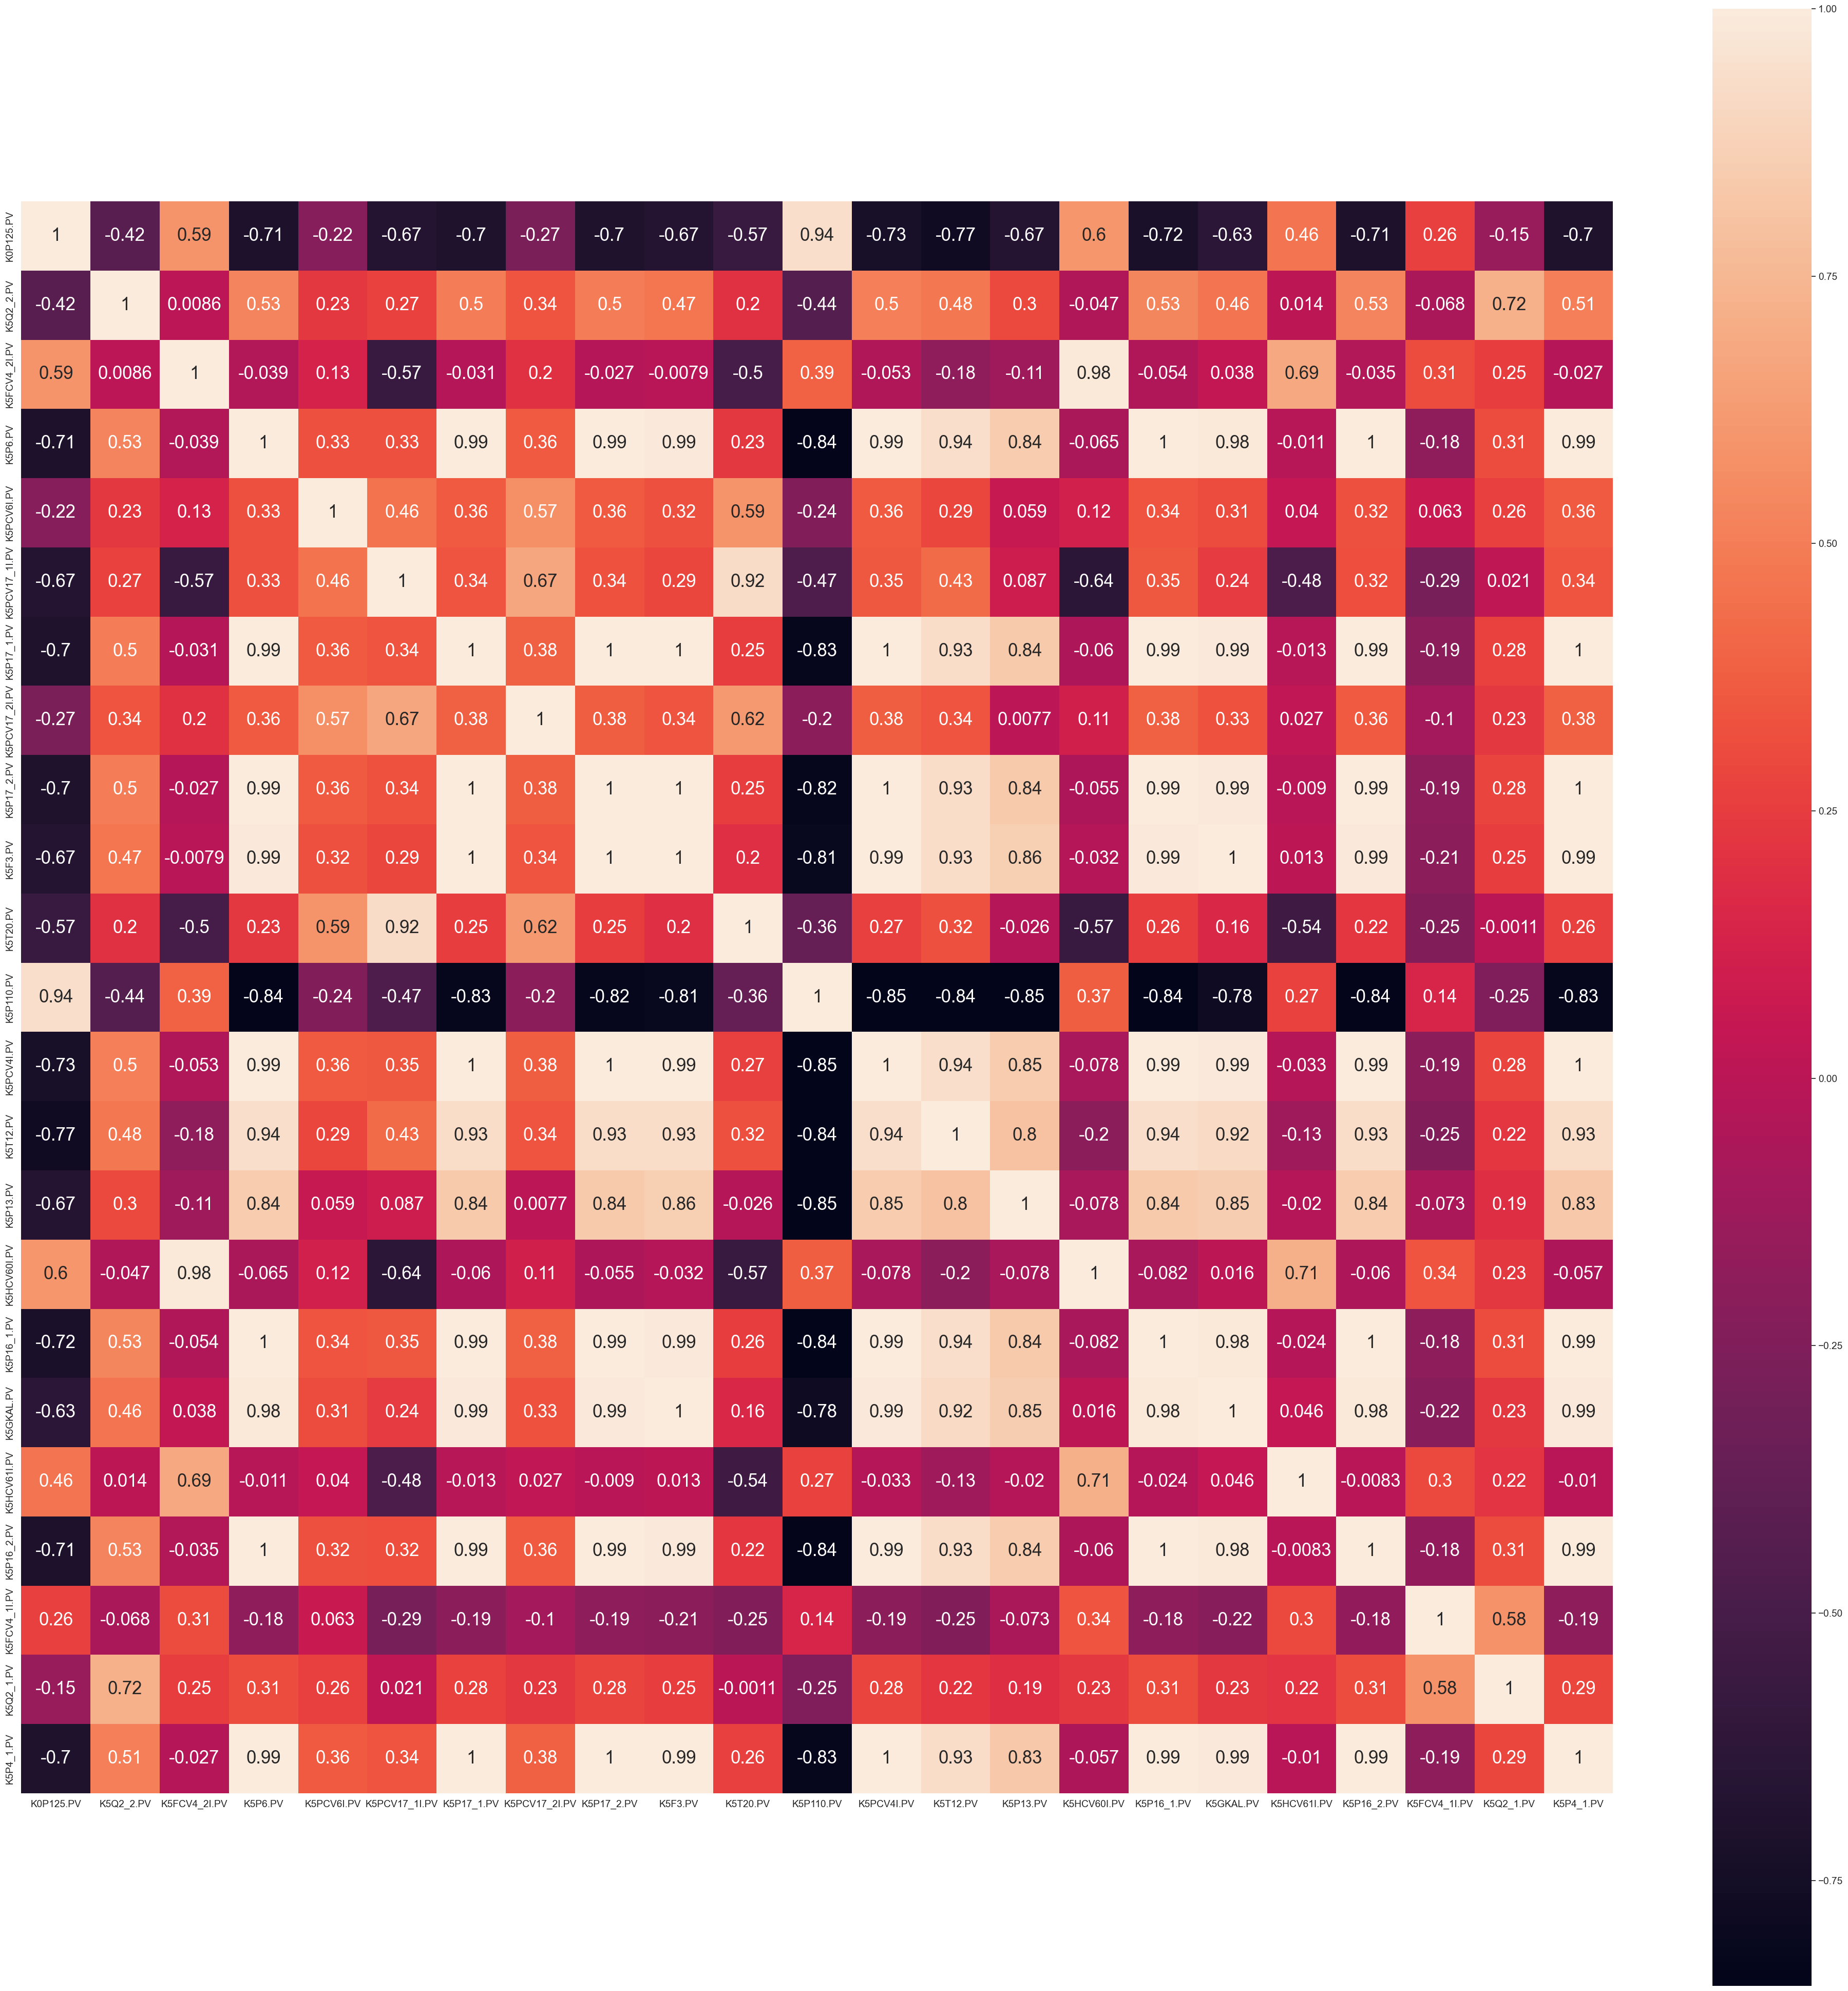

In [6]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [8]:
df = pd.read_csv('..\Initial_data\K0P125\K0P125.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_468\3533823770.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K0P125\K0P125.csv', ";")


,K0P125.PV,K5P110.PV
0,69.02493,66.25404
1,68.95270,66.53107
2,68.93040,66.39844
3,68.89967,66.23507
4,68.89850,66.52406
...,...,...
124,66.75259,63.60427
125,66.68513,62.94697
126,66.65165,63.17867
127,66.58926,62.96270


In [10]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5P110.PV"])
df=df.drop_duplicates(["K0P125.PV"])
df

,K0P125.PV,K5P110.PV
0,69.02,66.25
1,68.95,66.53
2,68.93,66.40
3,68.90,66.24
6,68.86,66.13
...,...,...
124,66.75,63.60
125,66.69,62.95
126,66.65,63.18
127,66.59,62.96


In [14]:
y = df.drop(['K5P110.PV'], axis=1)
x = df.drop(['K0P125.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(60, 70, 100)[:, np.newaxis] # Точки для предсказания

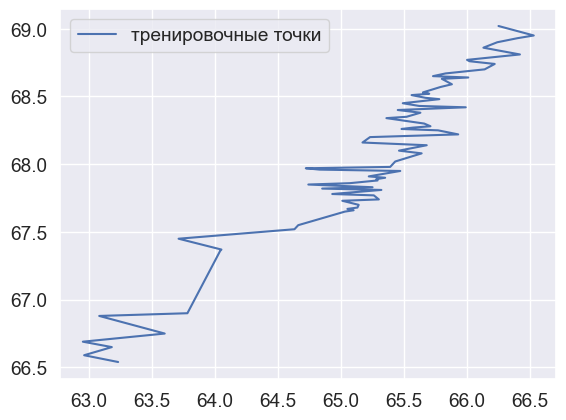

In [15]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


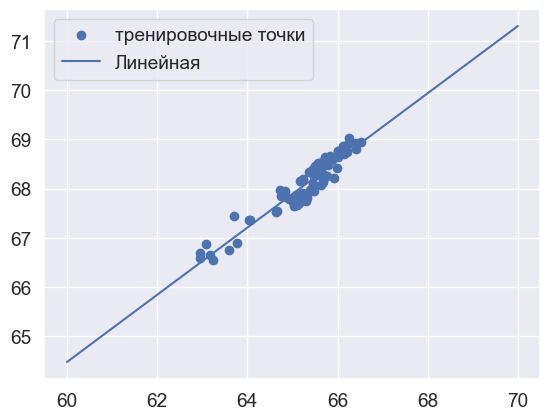

array([0.71340962, 0.2629535 , 0.59351291, 0.9453838 , 0.95713155])

In [19]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=5)

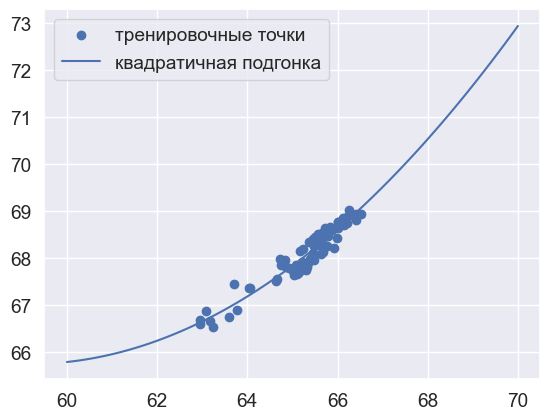

array([0.70475813, 0.90799087])

In [17]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


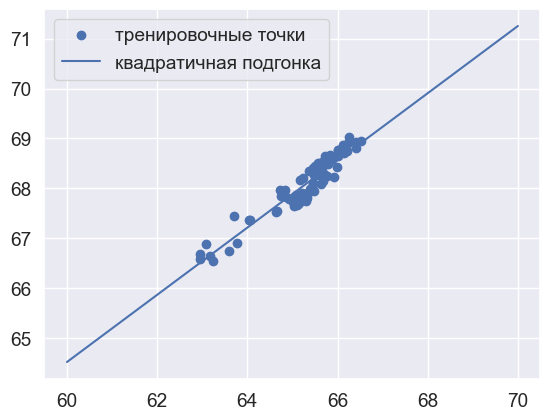

0.8916597344826777

In [18]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [20]:
import pickle
filename = '../model/K0P125.sav'
pickle.dump(lr, open(filename, 'wb'))

In [22]:
loaded_model = pickle.load(open("../model/K0P125.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=5)

array([0.71340962, 0.2629535 , 0.59351291, 0.9453838 , 0.95713155])

In [23]:
a=np.array([[63.23]])

In [24]:
loaded_model.predict(a)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.67920939]])